# Oasis Infobytes : Data Science Internship
## Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING
### Name of Intern : Suchitra D. Patil
### Batch - January Phase 2 OIBSIP.

#### Importing required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#### Importing Dataset 

In [2]:
car = pd.read_csv("C:/Users/admin/Desktop/Internships/OASIS Infobytes/car_price_predicition_data.csv")

#### Data Inspecting

In [3]:
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
car.size

2709

In [7]:
car.shape

(301, 9)

In [8]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
car.duplicated().sum()

2

In [12]:
car.drop_duplicates(keep = 'first', inplace = True)
car.duplicated().sum()

0

In [13]:
print(car.Fuel_Type.value_counts())
print(car.Seller_Type.value_counts())
print(car.Transmission.value_counts())

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        193
Individual    106
Name: Seller_Type, dtype: int64
Manual       260
Automatic     39
Name: Transmission, dtype: int64


#### Encoding the categorical data

In [14]:
car['Fuel_Type'].replace({"Petrol":0, "Diesel":1, "CNG":2},inplace = True)
car['Seller_Type'].replace({"Dealer":0, "Individual":1},inplace = True)
car['Transmission'].replace({"Manual":0, "Automatic":1}, inplace = True)
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


#### Data Modeling

In [15]:
#splitting data into x and y
x = car.drop(['Car_Name','Selling_Price'], axis = 1)
y = car['Selling_Price']

In [16]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [17]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 2)

### Linear regression

In [19]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [20]:
#training data prediction
training_data_prediction = lr_model.predict(x_train)

In [21]:
error_1 = metrics.r2_score(y_train, training_data_prediction)

In [22]:
print('R2 Squared Error of Training Data:', error_1)

R2 Squared Error of Training Data: 0.8830066323340682


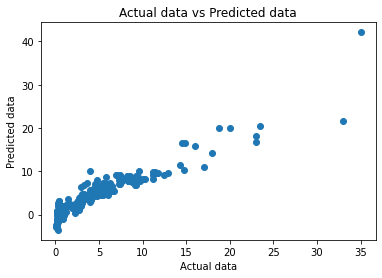

In [24]:
#Visualization of predicted and actual training data
plt.scatter(y_train, training_data_prediction)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

In [25]:
#testing data prediction
test_data_prediction = lr_model.predict(x_test)

In [26]:
error_2 = metrics.r2_score(y_test, test_data_prediction)

In [27]:
print('R2 Squared Score of Testing Data:', error_2)

R2 Squared Score of Testing Data: 0.7895030781336105


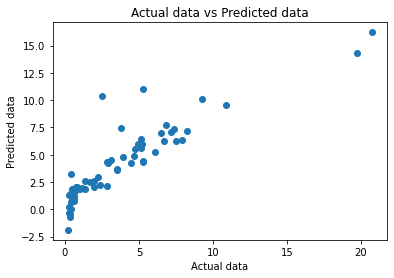

In [28]:
#visualization of actual and predicted testing data
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual data')
plt.ylabel('Predicted data')
plt.title('Actual data vs Predicted data')
plt.show()

# Thank You